In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

See paper: https://arxiv.org/pdf/1306.2247.pdf

In [5]:
datatypes = {'N(GC)':'float64'}
df = pd.read_csv('GCS_table.txt', header=36, sep="\s+", skip_blank_lines=False, na_values='nd')
# df['N(GC)'] = df['N(GC)'].astype('float64')
df.dtypes

Galaxy      object
OtherID     object
RA         float64
DEC        float64
Type        object
D          float64
D+-        float64
Method      object
A_V        float64
M_V^T      float64
M_V^T+-    float64
M_K        float64
M_K+-      float64
N(GC)      float64
N(GC)+-    float64
Source      object
sig_e      float64
sig_e+-    float64
R_e        float64
R_e+-      float64
lgM_d      float64
lgM_d+-    float64
lgM_G      float64
lgM_G+-    float64
lgM_B      float64
lgM_B+     float64
lgM_B-     float64
hr         float64
deg        float64
Mpc        float64
km/s       float64
kpc        float64
M_sun      float64
M_sun.1    float64
M_sun.2    float64
dtype: object

In [6]:
pd.to_numeric(df['N(GC)'])

0        160.0
1          1.0
2        150.0
3         36.0
4         10.0
        ...   
417     2833.0
418    18000.0
419      850.0
420     3000.0
421       17.0
Name: N(GC), Length: 422, dtype: float64

In [7]:
df.head()

,Galaxy,OtherID,RA,DEC,Type,D,D+-,Method,A_V,M_V^T,...,lgM_B+,lgM_B-,hr,deg,Mpc,km/s,kpc,M_sun,M_sun.1,M_sun.2
0,MilkyWay,nid,NaN,NaN,Sbc,NaN,NaN,geometry,0.000,-21.30,...,0.04,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WLM,DDO-221,0.032838,-15.460928,Irr,1.00,0.10,TRGB/Cepheid,0.088,-14.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NGC7814,nid,0.054144,16.145548,Sab,13.18,0.88,SBF,0.147,-20.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NGC55,nid,0.248224,-39.196582,SBm,2.09,0.08,TRGB/Cepheid,0.036,-18.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NGC147,nid,0.553330,48.508600,E5,0.76,0.10,TRGB/SBF,0.475,-15.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
i = 1
for col in df.columns:
    print(i, col)
    i+=1

1 Galaxy
2 OtherID
3 RA
4 DEC
5 Type
6 D
7 D+-
8 Method
9 A_V
10 M_V^T
11 M_V^T+-
12 M_K
13 M_K+-
14 N(GC)
15 N(GC)+-
16 Source
17 sig_e
18 sig_e+-
19 R_e
20 R_e+-
21 lgM_d
22 lgM_d+-
23 lgM_G
24 lgM_G+-
25 lgM_B
26 lgM_B+
27 lgM_B-
28 hr
29 deg
30 Mpc
31 km/s
32 kpc
33 M_sun
34 M_sun.1
35 M_sun.2


In [10]:
df['N(GC)']

0        160.0
1          1.0
2        150.0
3         36.0
4         10.0
        ...   
417     2833.0
418    18000.0
419      850.0
420     3000.0
421       17.0
Name: N(GC), Length: 422, dtype: float64

Text(0, 0.5, 'Number of globular clusters')

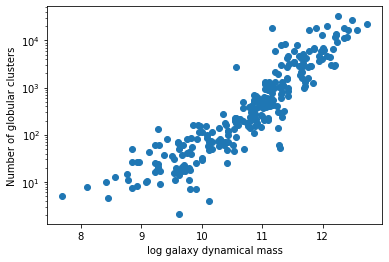

In [11]:
fig, ax = plt.subplots()
ax.scatter(df['lgM_d'], df['N(GC)'])
ax.set_yscale("log")
ax.set_xlabel("log galaxy dynamical mass")
ax.set_ylabel("Number of globular clusters")

Text(0, 0.5, 'Number of globular clusters')

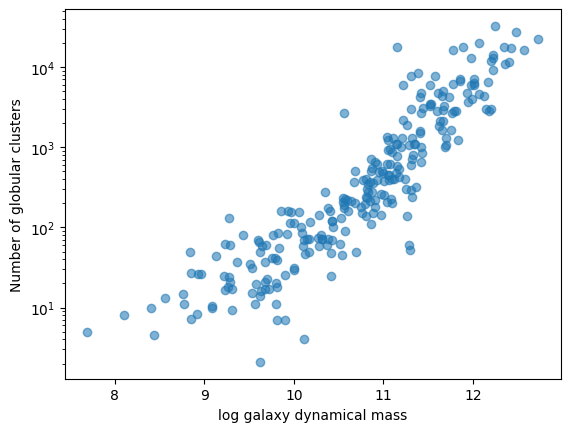

In [252]:
fig, ax = plt.subplots()
ax.scatter(df['lgM_d'], df['N(GC)'], alpha=0.57)
ax.set_yscale("log")
ax.set_xlabel("log galaxy dynamical mass")
ax.set_ylabel("Number of globular clusters")

Restrict galaxy mass to between 10.5 and 11.5

In [12]:
d = df[ (df['lgM_d'] > 10.5)  & (df['lgM_d'] < 11.2)]
print(len(d))
d.head()

74


,Galaxy,OtherID,RA,DEC,Type,D,D+-,Method,A_V,M_V^T,...,lgM_B+,lgM_B-,hr,deg,Mpc,km/s,kpc,M_sun,M_sun.1,M_sun.2
2,NGC7814,nid,0.054144,16.145548,Sab,13.18,0.88,SBF,0.147,-20.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NGC224,M31,0.712316,41.268883,Sb,0.77,0.02,TRGB/Cepheid,0.170,-21.80,...,0.2,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NGC253,nid,0.792531,-25.288442,SABc,3.54,0.20,TRGB,0.051,-21.01,...,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NGC474,nid,1.335186,3.415338,S0,29.51,1.53,SBF,0.094,-20.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NGC584,nid,1.522418,-6.868051,E4,20.14,1.94,SBF,0.140,-21.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
